### **Week 7**

---



# Lab Objective

In this lab, we will learn to implement a fuzzy inference system (FIS) using the scikit-fuzzy python module. The FIS used in this lab is used only for prediction. Later, we will learn how to use FIS for control problem.
In this lab, we consider the problem of diabetes prediction.


We follow the steps for desinging an FIS as presented in Week 6 lecture.

We include a basic code for diabetes detection using only 2 antecedants (BMI & glucose level) and three rules. You should extend this FIS by adding more antecedants and rules.

# Install scikit-fuzzy Module

First, we need to install scikit-fuzzy Module as it's not installed on lab machines. You can install it on your own device or on Colab.

In [1]:
pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 5.3 MB/s eta 0:00:00


# Model Design

## 1- Define inputs and outputs

We define 5 inputs (antecedants) and only one output. Notice that we need to specify name (or label) and range for each input and output.

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl


bmi         = ctrl.Antecedent(np.arange(0, 50, 1), 'bmi')
pregnancies = ctrl.Antecedent(np.arange(0, 15, 1), 'pregnancies')
glucose     = ctrl.Antecedent(np.arange(0, 201, 1), 'glucose')
blood_pressure = ctrl.Antecedent(np.arange(0, 201, 1), 'blood_pressure')
age         = ctrl.Antecedent(np.arange(0, 101, 1), 'age')

diabetes_risk = ctrl.Consequent(np.arange(0, 1, 0.1), 'diabetes_risk')




## 2- Fuzzification and membership functions

We create three fuzzy sets for each input & output. We also define the type & parameter for each membership function. You can change the number of fuzzy sets and/or the membership function for one or more inputs/outputs.

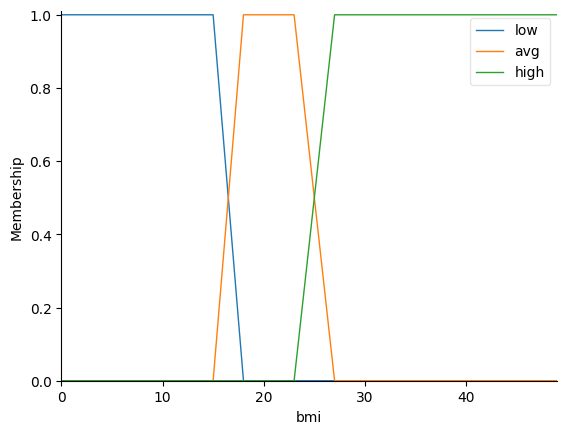

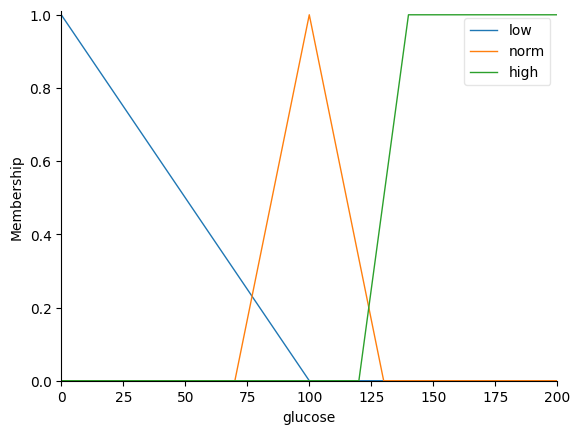

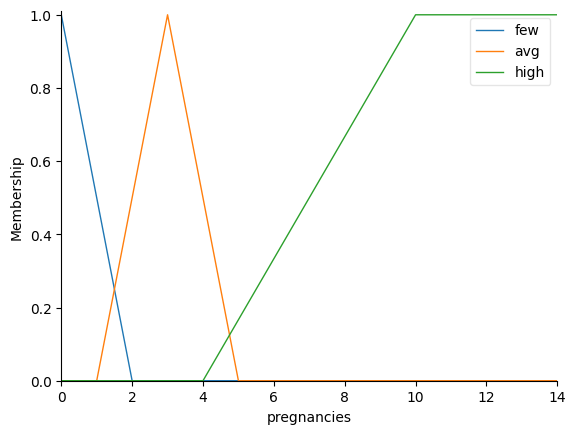

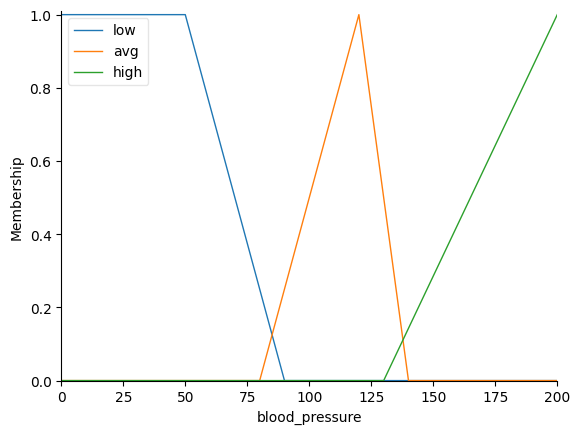

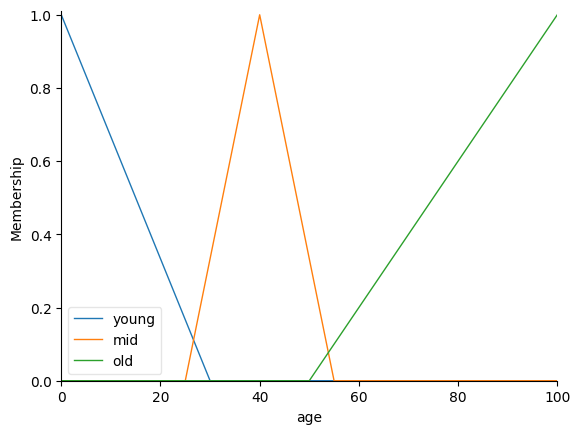

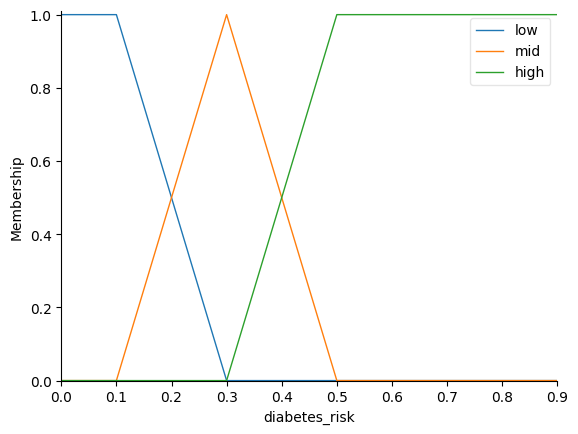

In [3]:

bmi['low'] = fuzz.trapmf(bmi.universe, [0, 0, 15, 18])
bmi['avg'] = fuzz.trapmf(bmi.universe, [15, 18, 23,27])
bmi['high'] = fuzz.trapmf(bmi.universe, [23, 27, 50, 50])
bmi.view()

glucose['low'] = fuzz.trimf(glucose.universe, [0, 0, 100])
glucose['norm'] = fuzz.trimf(glucose.universe, [70, 100, 130])
glucose['high'] = fuzz.trapmf(glucose.universe, [120, 140, 200,200])
glucose.view()

pregnancies['few'] = fuzz.trimf(pregnancies.universe, [0, 0, 2])
pregnancies['avg'] = fuzz.trimf(pregnancies.universe, [1, 3, 5])
pregnancies['high'] = fuzz.trapmf(pregnancies.universe, [4, 10, 15,15])
pregnancies.view()

blood_pressure['low'] = fuzz.trapmf(blood_pressure.universe, [0, 0, 50, 90])
blood_pressure['avg'] = fuzz.trimf(blood_pressure.universe, [80, 120, 140])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [130, 200, 200])
blood_pressure.view()

age['young'] = fuzz.trimf(age.universe, [0, 0, 30])
age['mid'] = fuzz.trimf(age.universe, [25, 40, 55])
age['old'] = fuzz.trimf(age.universe, [50, 100, 100])
age.view()

diabetes_risk['low'] = fuzz.trapmf(diabetes_risk.universe, [0, 0, 0.1, 0.3])
diabetes_risk['mid'] = fuzz.trimf(diabetes_risk.universe, [0.1, 0.3, 0.5])
diabetes_risk['high'] = fuzz.trapmf(diabetes_risk.universe, [0.3, 0.5, 1, 1])
diabetes_risk.view()

## 3- Knowledge base

Here we create the fuzzy rules. Remember that the quality of your fuzzy rules impact the performance of the FIS. The completeness of the rules determine the scope for using your FIS.

In [4]:

#Rule 1: BMI Underweight + Glucose Low + Blood Pressure Low = Low Risk
rule1 = ctrl.Rule(bmi['low'] & glucose['low'] | bmi['avg'] & glucose['norm'] , diabetes_risk['low'])
rule2 = ctrl.Rule(bmi['high'] & glucose['high'] , diabetes_risk['high'])
rule3 = ctrl.Rule(bmi['high'] & glucose['norm'] , diabetes_risk['mid'])


## 4- Inference Engine

### Q1

By default, antecedants are combined as follows:

*   & is implemented minimum
*   | is implemented as maximum

However, you can change this. For example below we change the implementation of | for Rule3 by selecting the average membership value:



In [5]:
def mean_of_two(a, b):
    return (a+b)/2

rule3 = ctrl.Rule(bmi['high'] & glucose['norm'] , diabetes_risk['mid'],  and_func=mean_of_two)

### Q2

The results of the rules are aggregated using OR (or union) in scikit-fuzzy module. We cannot change this unless we modify the source code.

## 5- Defuzzification

In [6]:
diabetes_risk.defuzzify_method = 'mom' # mom: mean of maximum , som: small of maximum , lom : large of max

# Model usage

In [7]:
# add your rules to your FIS system
# Whenever you create more rules, make sure to add them to the list here
fis = ctrl.ControlSystem([rule1,  rule2 , rule3])
fis_simulator = ctrl.ControlSystemSimulation(fis)

# Now, test yur FIS with some inputs & check the outputs
fis_simulator.input['bmi'] = 24
fis_simulator.input['glucose'] = 80

fis_simulator.compute()
print(fis_simulator.output['diabetes_risk'])


0.11458333333333333


# Lab Tasks


*   Check Fuzzy sets & modify as needed
*   Add more fuzzy rules containing one of the other antecdants: age, blood pressure, or pregnancies
*   Modify model usage so that your inputs contain all the antecedants that appear in your rules
*   Change defuzzification method



